In [1]:
import pandas as pd

#### Group By method
##### Split, apply, combine

In [2]:
# load drinks data
alcohol_df = pd.read_csv('../Data/drinks.csv')

In [3]:
# find the average 'beer_servings'
alcohol_df['beer_servings'].mean()

106.16062176165804

In [4]:
# find the average 'beer_servings' just for countries in Africa
alcohol_df.loc[alcohol_df['continent'] == 'Africa']['beer_servings'].mean()

61.471698113207545

In [5]:
# find the average beer servings for each continent
alcohol_df.groupby('continent')['beer_servings'].mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [6]:
# find the mx value of beer servings for each continent
alcohol_df.groupby('continent')['beer_servings'].max()

continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
South America    333
Name: beer_servings, dtype: int64

In [7]:
# you can use your own functions
def peak_to_peak(group):
    return group.max() - group.min()

In [10]:
alcohol_df.groupby('continent')[['beer_servings', 'spirit_servings', 'wine_servings']].apply(peak_to_peak)

,beer_servings,spirit_servings,wine_servings
continent,,,
Africa,376,152,233
Asia,247,326,123
Europe,361,373,370
North America,284,370,99
Oceania,306,254,212
South America,240,277,220


In [16]:
# top 5 wine servings countries by continent
def top5(group):
    return group.sort_values(by='wine_servings', ascending=False).head(5) #[:5] also works (slice notation, reverse order)

alcohol_df.groupby('continent').apply(top5)

country  beer_servings  spirit_servings  \
continent                                                                
Africa        55     Equatorial Guinea             92                0   
              148  Sao Tome & Principe             56               38   
              159         South Africa            225               76   
              62                 Gabon            347               98   
              152           Seychelles            157               25   
Asia          92                  Laos             62                0   
              141   Russian Federation            247              326   
              177         Turkmenistan             19               71   
              94               Lebanon             20               55   
              167                Syria              5               35   
Europe        61                France            127              151   
              136             Portugal            194               67   
              3                Andorra            245              138   
              166          Switzerland            185              100   
              48               Denmark            224               81   
North America 32                Canada            240              122   
              184                  USA            249              158   
              144            St. Lucia            171              315   
              11               Bahamas            122              176   
              5      Antigua & Barbuda            102              128   
Oceania       8              Australia            261               72   
              121          New Zealand            203               79   
              40          Cook Islands              0              254   
              146                Samoa            105               18   
              129                Palau            306               63   
South America 6              Argentina            193               25   
              185              Uruguay            115               35   
              35                 Chile            130              124   
              132             Paraguay            213              117   
              133                 Peru            163              160   

                   wine_servings  total_litres_of_pure_alcohol      continent  
continent                                                                      
Africa        55             233                           5.8         Africa  
              148            140                           4.2         Africa  
              159             81                           8.2         Africa  
              62              59                           8.9         Africa  
              152             51                           4.1         Africa  
Asia          92             123                           6.2           Asia  
              141             73                          11.5           Asia  
              177             32                           2.2           Asia  
              94              31                           1.9           Asia  
              167             16                           1.0           Asia  
Europe        61             370                          11.8         Europe  
              136            339                          11.0         Europe  
              3              312                          12.4         Europe  
              166            280                          10.2         Europe  
              48             278                          10.4         Europe  
North America 32             100                           8.2  North America  
              184             84                           8.7  North America  
              144             71                          10.1  North America  
              11              51                           6.3

#### Unstack

In [17]:
# load tips dataset
tips_df = pd.read_csv('../Data/tips.csv')

In [21]:
tips_df['percentage'] = round(tips_df['tip'] / tips_df['total_bill'] * 100, 2)

In [27]:
# average smoker vs non smoker tip percentage
tips_df.groupby('smoker')['percentage'].mean()

smoker
No     15.932318
Yes    16.319140
Name: percentage, dtype: float64

In [32]:
# bar chart avg tip percentage per day and smoker status
tips_df.groupby(['day', 'smoker'])['percentage'].mean()#.plot(kind='bar') # this has a multi index

day   smoker
Fri   No        15.165000
      Yes       17.478667
Sat   No        15.804222
      Yes       14.790000
Sun   No        16.011228
      Yes       18.724737
Thur  No        16.028667
      Yes       16.385294
Name: percentage, dtype: float64

In [42]:
tips_df.groupby(['day', 'smoker'])['percentage'].mean().unstack(level=1) # this has a single index
# level refers to the index level, 0 is the first index, 1 is the second index, etc. (in this case, 0 is day, 1 is smoker)

smoker,No,Yes
day,,
Fri,15.165000,17.478667
Sat,15.804222,14.790000
Sun,16.011228,18.724737
Thur,16.028667,16.385294


#### pivot table

In [43]:
tips_df.pivot_table(index='day', columns='smoker', values='percentage', aggfunc='mean') # this has a single index
# index refers to the index column, columns refers to the column to pivot, values refers to the values to aggregate, aggfunc refers to the aggregation function

smoker,No,Yes
day,,
Fri,15.165000,17.478667
Sat,15.804222,14.790000
Sun,16.011228,18.724737
Thur,16.028667,16.385294


<p>find mean 'percentage' values by time, day, and smoker</p>

In [60]:
# using groupby
tips_df.groupby(['day', 'smoker', 'time'])['percentage'].mean()

day   smoker  time  
Fri   No      Dinner    13.963333
              Lunch     18.770000
      Yes     Dinner    16.535556
              Lunch     18.893333
Sat   No      Dinner    15.804222
      Yes     Dinner    14.790000
Sun   No      Dinner    16.011228
      Yes     Dinner    18.724737
Thur  No      Dinner    15.970000
              Lunch     16.030000
      Yes     Lunch     16.385294
Name: percentage, dtype: float64

In [61]:
# using pivot table (same result as above)
tips_df.pivot_table(index=['day', 'time'], columns='smoker', values='percentage', aggfunc='mean', fill_value=0)
# fill_value fills in missing values with 0

smoker              No        Yes
day  time                        
Fri  Dinner  13.963333  16.535556
     Lunch   18.770000  18.893333
Sat  Dinner  15.804222  14.790000
Sun  Dinner  16.011228  18.724737
Thur Dinner  15.970000   0.000000
     Lunch   16.030000  16.385294

#### resampling and rolling

In [65]:
# load fremont bridge data
bridge_df = pd.read_csv('../Data/Fremont_Bridge_Bicycle_Counter.csv', parse_dates=True, index_col='Date')

In [67]:
# renaming columns
bridge_df.columns = ['Total','West', 'East']

<AxesSubplot:xlabel='Date'>

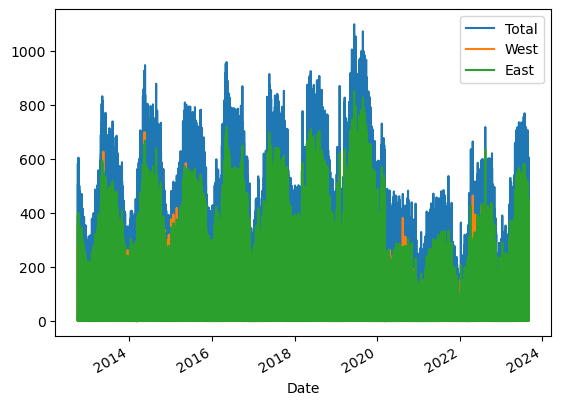

In [69]:
# plot the data
bridge_df.plot()

<AxesSubplot:xlabel='Date'>

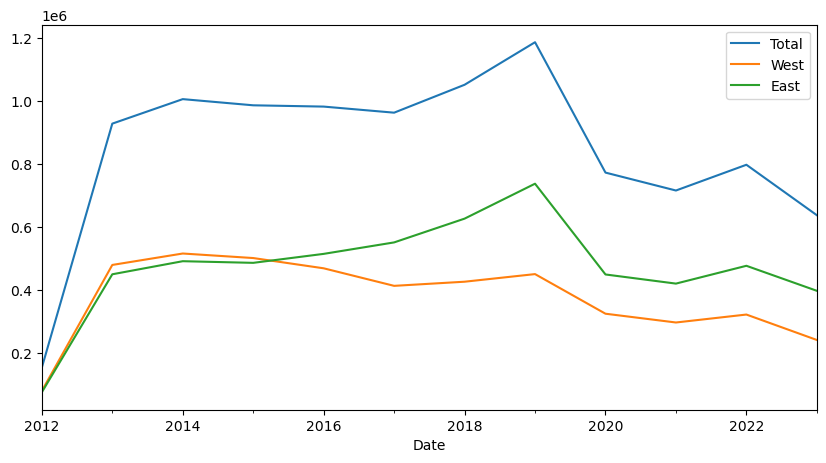

In [76]:
# resample by day or month or year (D or M or Y)
bridge_df.resample('Y').sum().plot(figsize=[10,5]) # monthly sum of bike crossings

#### rolling (moving average)

<AxesSubplot:xlabel='Date'>

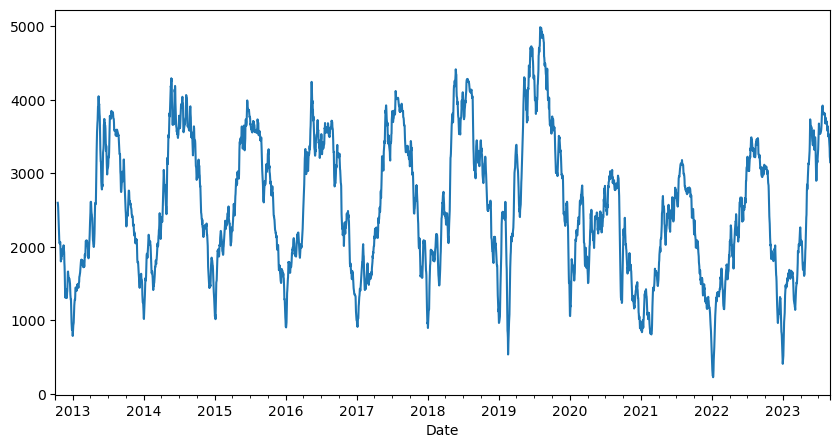

In [83]:
bridge_df.resample('D').sum()['Total'].rolling(14).mean().plot(figsize=[10,5])
# use rolling to get a moving average (n day average)

In [88]:
daily = bridge_df.pivot_table(index=bridge_df.index.time, columns=bridge_df.index.date, values='Total')
#  hour based index, day based columns, values are total crossings

In [89]:
daily

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07,2012-10-08,2012-10-09,2012-10-10,2012-10-11,2012-10-12,...,2023-08-22,2023-08-23,2023-08-24,2023-08-25,2023-08-26,2023-08-27,2023-08-28,2023-08-29,2023-08-30,2023-08-31
00:00:00,13.0,18.0,11.0,15.0,11.0,9.0,12.0,15.0,21.0,17.0,...,8.0,10.0,7.0,14.0,27.0,28.0,8.0,7.0,6.0,13.0
01:00:00,10.0,3.0,8.0,15.0,17.0,4.0,3.0,3.0,10.0,13.0,...,1.0,4.0,3.0,12.0,15.0,14.0,4.0,3.0,6.0,6.0
02:00:00,2.0,9.0,7.0,9.0,3.0,5.0,4.0,3.0,13.0,5.0,...,8.0,5.0,6.0,3.0,10.0,5.0,5.0,2.0,5.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0,5.0,8.0,4.0,2.0,7.0,...,4.0,3.0,1.0,0.0,4.0,1.0,3.0,4.0,4.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0,5.0,9.0,5.0,12.0,5.0,...,11.0,4.0,13.0,11.0,3.0,5.0,8.0,11.0,11.0,10.0
05:00:00,31.0,26.0,25.0,5.0,9.0,23.0,31.0,25.0,12.0,14.0,...,26.0,27.0,25.0,28.0,12.0,5.0,33.0,16.0,32.0,25.0
06:00:00,155.0,142.0,105.0,27.0,17.0,137.0,153.0,149.0,43.0,87.0,...,119.0,100.0,111.0,73.0,59.0,18.0,110.0,85.0,103.0,112.0
07:00:00,352.0,319.0,319.0,33.0,26.0,327.0,368.0,340.0,304.0,183.0,...,326.0,335.0,291.0,181.0,54.0,35.0,191.0,256.0,289.0,271.0
08:00:00,437.0,418.0,370.0,105.0,69.0,457.0,462.0,435.0,404.0,268.0,...,528.0,446.0,464.0,267.0,72.0,63.0,344.0,390.0,407.0,409.0
09:00:00,276.0,241.0,212.0,114.0,103.0,278.0,275.0,255.0,189.0,145.0,...,332.0,307.0,306.0,151.0,128.0,102.0,239.0,246.0,264.0,243.0
